# Sklearn

# Визуализация данных

<font color=darkblue>Подключаем набор данных</font>

In [1]:
#from sklearn import datasets
import pandas as pd
import numpy as np
%pylab inline

from configs_MNIST_Fashion import DATA_DIR, LOG_DIR, ROOT_DIR
from libs.MNIST_Fashion import mnist_reader
from libs.MNIST_Fashion.helper import get_sprite_image

Populating the interactive namespace from numpy and matplotlib


<font color=darkblue>Проверка переменных для закачки датасета</font>

In [2]:
for s in [ROOT_DIR, DATA_DIR, LOG_DIR]:
    print(s)
    
#DATA_DIR = u'../data/'

/home/programmer/Tests/t-SNE_and_UMAP/
/home/programmer/Tests/t-SNE_and_UMAP/data/MNIST_Fashion/
/home/programmer/Tests/t-SNE_and_UMAP/logs/MNIST_Fashion/


In [3]:
DATA_DIR

'/home/programmer/Tests/t-SNE_and_UMAP/data/MNIST_Fashion/'

### Загрузка выборки

In [4]:
def get_data():
    X, Y = mnist_reader.load_mnist(path=DATA_DIR, kind='t10k')

    labels = ['t_shirt_top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
    Y_str = np.array([labels[j] for j in Y])

    columns = ['X', 'Y', 'Y_str']
    df = pd.DataFrame(columns=columns)
    df_tmp = pd.DataFrame(columns=columns)

    df_tmp['X'] = X[:].tolist()
    df_tmp['Y'] = Y[:]
    df_tmp['Y_str'] = Y_str[:]

    df_tmp.sort_values(['Y'], ascending=[True], inplace=True, axis=0)
    labels_ids = df_tmp['Y'].unique()
    line_index = 0

    for cur_id in sorted(labels_ids):
        for cur_line in df_tmp[df_tmp['Y'] == cur_id][:200].values:
            df.loc[line_index] = [cur_line[i] for i in range(3)]
            line_index += 1

    X = np.array([line for line in df['X'].values])
    Y = np.array([line for line in df['Y'].values])
    Y_str = np.array([line for line in df['Y_str'].values])

    plt.imsave(DATA_DIR + '/mnist-fashion-sprite.png', get_sprite_image(X), cmap='gray')
    return X, Y, Y_str, df

X, Y, Y_str, df = get_data()

<font color=darkblue>Проверим структуру выборки</font>

In [5]:
df.Y_str.value_counts()

shirt          200
coat           200
bag            200
sneaker        200
ankle_boots    200
sandal         200
t_shirt_top    200
dress          200
trouser        200
pullover       200
Name: Y_str, dtype: int64

<font color=darkblue>Примеры значений для первого элемента</font>

In [6]:
print('target:', Y[0], Y_str[0])
print('features: \n', X[0] )
print('number of features:', len(X[0]))

target: 0 t_shirt_top
features: 
 [  0   0   0   0   0   0   0   0  65 161  57   2   0   0   0   0   0   0
  46 166 121   0   0   0   1   0   0   0   0   0   0   1   0   0 141 177
 172 198 184 203 208 208 235 221 168 212 207 203 176 196 154  15   0   1
   0   0   0   0   0   8   0  49 189 148 165 173 179 191 168 176 207 193
 191 168 173 187 165 152 190 117   0   2   0   0   0   0   0   1   0  91
 177 161 184 172 156 197 135 201 203 177 175 214 166 144 189 168 172 135
   0   0   0   0   0   0   0   0   0 147 177 165 169 156 161 152 168 179
 176 158 140 137 179 151 159 163 170 161   0   0   0   0   0   0   0   0
   0 175 173 169 179 168 170 159 163 182 176 182 187 172 163 173 159 170
 165 177  19   0   0   0   0   0   0   0   0 162 175 177 176 170 162 141
 165 184 158 156 151 162 162 155 170 169 172 184  60   0   0   0   0   0
   0   0  30 176 173 203 210 173 166 166 166 149 156 162 166 161 159 163
 169 198 161 182 102   0   0   0   0   0   0   0  58 180 170 151 119 200
 165 161 161 166 

## Визуализация объектов выборки

<font color=darkblue>у нас одномерный массив с изображением(784 эдемента), для визуализации его необходимо преобразовать к замеру(28х28)

иначе созникнет ошибка "Invalid dimensions for image data"

Добавим колонку X_reshaped в наш массив и будем ее использовать для визуализации</font>

In [7]:
#pylab.imshow(X[0])
shape_img = (28, 28)
X_reshaped = np.array([i.reshape(shape_img) for i in X[::1]])

<font color=darkblue>теперь можно показать изображение</font>

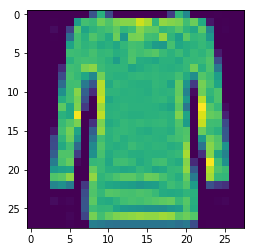

In [8]:
pylab.imshow(X_reshaped[0])

<font color=darkblue>существует множество вариантов отображения цветов</font>

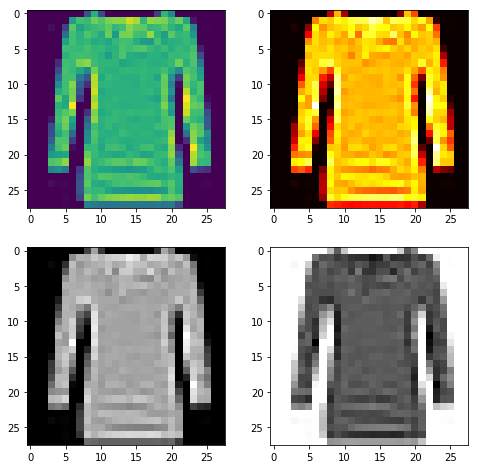

In [9]:
pyplot.figure(figsize(8, 8))

pyplot.subplot(2, 2, 1)
pylab.imshow(X_reshaped[0])

pyplot.subplot(2, 2, 2)
pylab.imshow(X_reshaped[0], cmap = 'hot')

pyplot.subplot(2, 2, 3)
pylab.imshow(X_reshaped[0], cmap = 'gray')

pyplot.subplot(2, 2, 4)
pylab.imshow(X_reshaped[0], cmap = 'gray_r')

<font color=darkblue>Отобразим первые 10 элементов выборки</font>

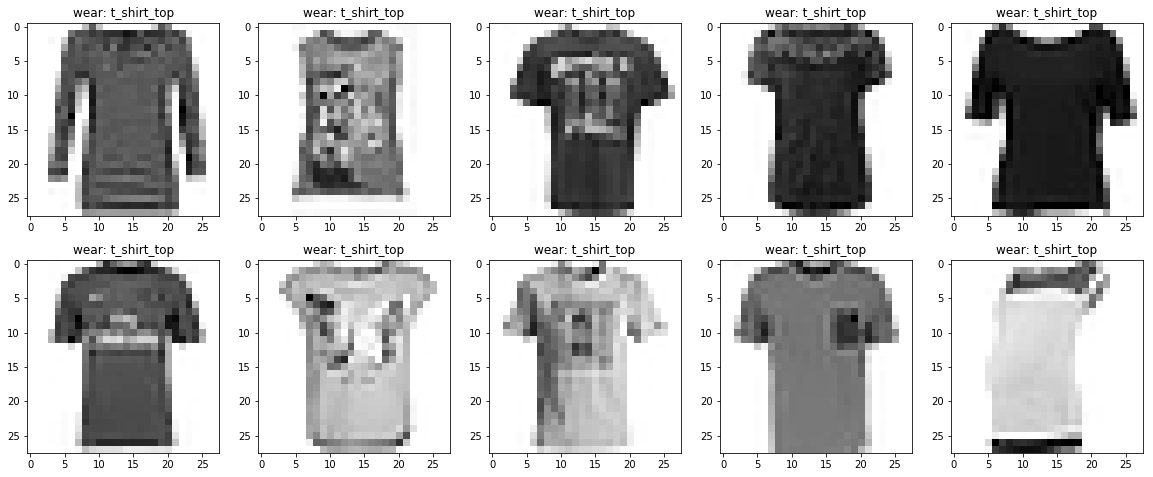

In [10]:
pyplot.figure(figsize(20, 8))

for plot_number, plot in enumerate(X_reshaped[:10]):
    pyplot.subplot(2, 5, plot_number + 1)
    pylab.imshow(plot, cmap = 'gray_r')
    pylab.title('wear: ' + str(Y_str[plot_number]))

## Уменьшение размерности

<font color=darkblue>Проверим как уменьшение размерности влияет на качество классификации. 

Для начала выполним классификацию в исходном пространстве признаков</font>

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
#from collections import Counter

<font color=darkblue>Применим классификация К-средних, проверим значения по умолчанию для классификатора</font>

In [12]:
classifier = KNeighborsClassifier()
classifier.fit(X, Y_str)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
print(classification_report(classifier.predict(X), Y_str))
print('Accuracy', accuracy_score(classifier.predict(X), Y_str)) 

              precision    recall  f1-score   support

 ankle_boots       0.94      0.90      0.92       211
         bag       0.92      0.94      0.93       195
        coat       0.81      0.71      0.76       227
       dress       0.89      0.90      0.89       196
    pullover       0.81      0.74      0.78       219
      sandal       0.75      0.99      0.85       151
       shirt       0.54      0.68      0.60       159
     sneaker       0.97      0.81      0.88       239
 t_shirt_top       0.83      0.79      0.81       212
     trouser       0.94      0.99      0.97       191

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.84      0.85      0.84      2000
weighted avg       0.85      0.84      0.84      2000

Accuracy 0.841


### PCA

<font color=darkblue>понизим размерность(с 784-х до 2-х) исходного пространства методом главных компонент.</font>

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=2, random_state=0)
data_2d_pca = pca.fit_transform(X)

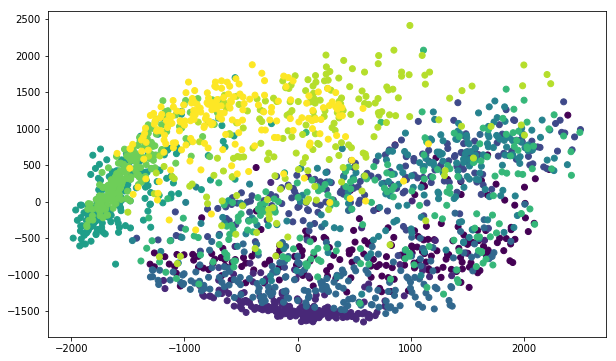

In [16]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c = Y)

In [17]:
classifier.fit(data_2d_pca, Y_str)
print(classification_report(classifier.predict(data_2d_pca), Y_str))
print('Accuracy', accuracy_score(classifier.predict(data_2d_pca), Y_str)) 

              precision    recall  f1-score   support

 ankle_boots       0.70      0.62      0.66       227
         bag       0.67      0.69      0.68       195
        coat       0.67      0.52      0.59       254
       dress       0.73      0.63      0.68       234
    pullover       0.59      0.57      0.58       208
      sandal       0.69      0.73      0.71       190
       shirt       0.39      0.55      0.45       141
     sneaker       0.68      0.72      0.70       188
 t_shirt_top       0.58      0.64      0.61       182
     trouser       0.81      0.90      0.85       181

   micro avg       0.65      0.65      0.65      2000
   macro avg       0.65      0.66      0.65      2000
weighted avg       0.66      0.65      0.65      2000

Accuracy 0.6505


<font color=darkblue>Качество значительно ухудшилось! Но попробуйте прибавить кол-во компонент</font>

### MDS

<font color=darkblue>Применим метод MDS</font>

In [18]:
from sklearn import manifold

In [19]:
mds = manifold.MDS(n_components = 10, n_init = 1, max_iter = 100)
data_2d_mds = mds.fit_transform(X)

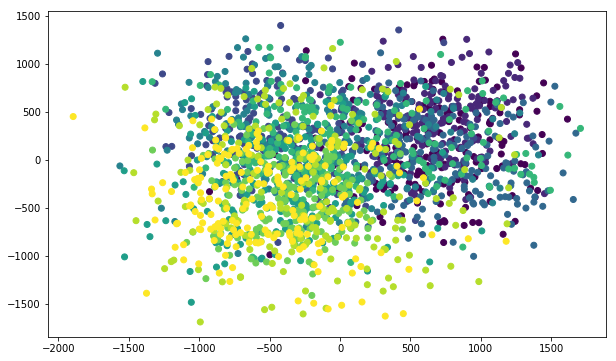

In [20]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = Y)

In [21]:
classifier.fit(data_2d_mds, Y_str)
print(classification_report(classifier.predict(data_2d_mds), Y_str))
print('Accuracy', accuracy_score(classifier.predict(data_2d_mds), Y_str)) 

              precision    recall  f1-score   support

 ankle_boots       0.84      0.78      0.81       217
         bag       0.80      0.84      0.82       190
        coat       0.67      0.51      0.58       260
       dress       0.74      0.65      0.69       230
    pullover       0.59      0.59      0.59       200
      sandal       0.72      0.88      0.80       164
       shirt       0.41      0.49      0.45       170
     sneaker       0.86      0.78      0.82       221
 t_shirt_top       0.55      0.70      0.61       156
     trouser       0.84      0.88      0.86       192

   micro avg       0.70      0.70      0.70      2000
   macro avg       0.70      0.71      0.70      2000
weighted avg       0.71      0.70      0.70      2000

Accuracy 0.704


### t- SNE

<font color=darkblue>применим метод t-SNE (занимает некоторе время)</font>

In [22]:
tsne = manifold.TSNE(n_components = 2,random_state = 42) #, init = 'pca', random_state = 0
data_2d_tsne = tsne.fit_transform(X)

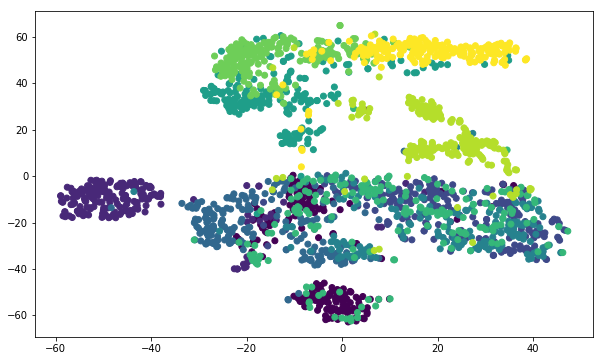

In [23]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = Y)


In [24]:
%time classifier.fit(data_2d_tsne, Y_str)
print(classification_report(classifier.predict(data_2d_tsne), Y_str))
print('Accuracy',accuracy_score(classifier.predict(data_2d_tsne), Y_str)) 

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 2.49 ms
              precision    recall  f1-score   support

 ankle_boots       0.94      0.90      0.92       207
         bag       0.94      0.96      0.95       196
        coat       0.77      0.65      0.71       234
       dress       0.88      0.87      0.87       202
    pullover       0.74      0.73      0.74       205
      sandal       0.84      0.93      0.88       181
       shirt       0.53      0.68      0.60       156
     sneaker       0.92      0.86      0.88       214
 t_shirt_top       0.83      0.77      0.80       215
     trouser       0.93      0.97      0.95       190

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.84      0.83      0.83      2000

Accuracy 0.83


<font color=darkblue>Получили преобразование которое позволило использовать 2 признака вместо 748, при том же качестве прогноза.</font>

### UMAP

In [25]:
import umap


In [26]:
umapp = umap.UMAP(n_neighbors=5, min_dist=0.1, metric="euclidean", n_components=2)
data_2d_umap = umapp.fit_transform(X)


In [27]:
data_2d_umap.shape

(2000, 2)

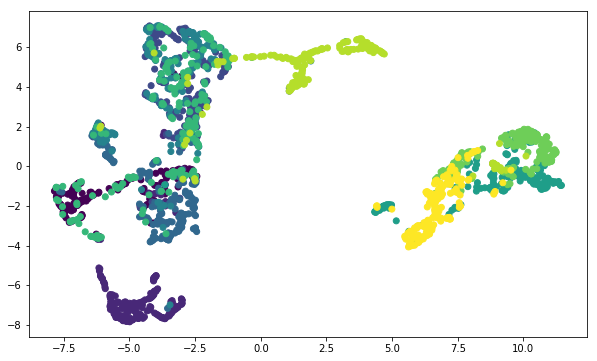

In [28]:
pylab.figure(figsize = (10, 6))
pylab.scatter(data_2d_umap[:, 0], data_2d_umap[:, 1], c = Y)


In [29]:
%time classifier.fit(data_2d_umap, Y_str)
print(classification_report(classifier.predict(data_2d_umap), Y_str))
print('Accuracy', accuracy_score(classifier.predict(data_2d_umap), Y_str)) 


CPU times: user 4 ms, sys: 4 ms, total: 8 ms
Wall time: 2.02 ms
              precision    recall  f1-score   support

 ankle_boots       0.94      0.90      0.92       208
         bag       0.92      0.92      0.92       200
        coat       0.80      0.65      0.71       245
       dress       0.88      0.83      0.85       210
    pullover       0.71      0.67      0.69       212
      sandal       0.81      0.92      0.86       176
       shirt       0.43      0.64      0.51       134
     sneaker       0.91      0.84      0.87       217
 t_shirt_top       0.81      0.76      0.78       211
     trouser       0.92      0.98      0.95       187

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.82      0.81      0.81      2000

Accuracy 0.811


# Кластеризация 

In [30]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import confusion_matrix, homogeneity_completeness_v_measure, silhouette_score, silhouette_samples

<font color=darkblue>classes = sorted(list(set(Y)))
classes_str = sorted(list(set(Y_str)))</font>

<font color=darkblue>classes_str

### Дендрограмма
<font color=darkblue>Визуализация данных в виде дендрограммы. Агломеративная кластеризация. попробуйте разные метрики расстояния, а также данные после проеобразования t-SNE</font>

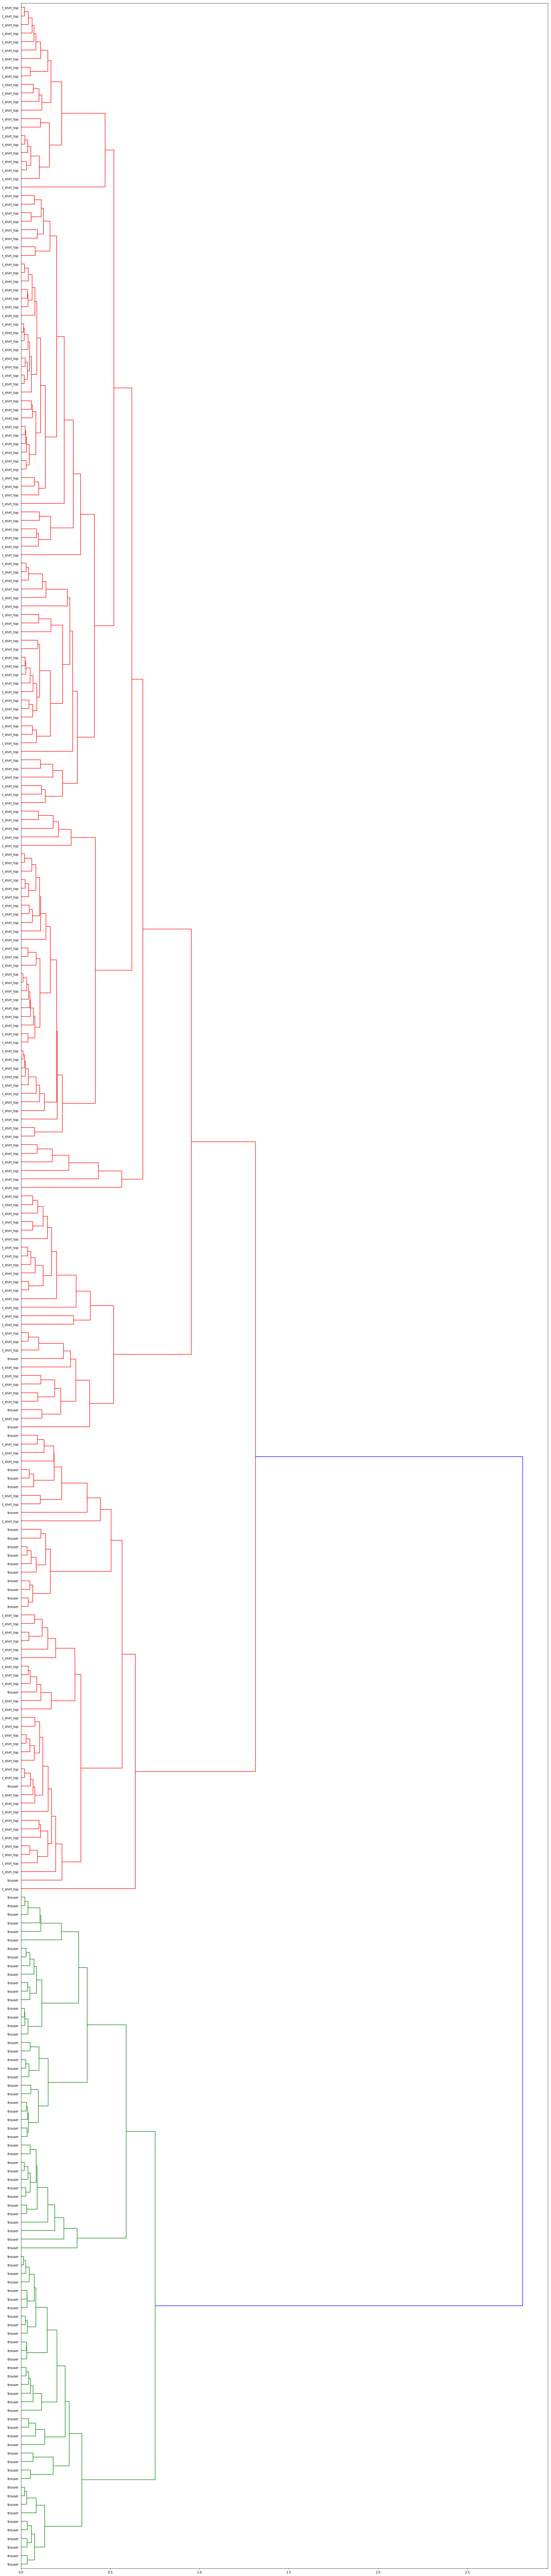

In [31]:
metric = "cosine" # euclidean=/cosine
labels=Y_str[:300]
cluster_x = X[:300] #data_2d_tsne[:300]
dist_matrix = pdist(cluster_x, metric=metric)
Z = linkage(dist_matrix, 'ward') #single/ward
fig = plt.figure(figsize=(30, 150))
dn = dendrogram(Z, labels=labels,leaf_font_size=10,distance_sort="ascending", truncate_mode="none",orientation='right') 

### К-mean, показатели качества

<font color=darkblue>Сформируем массив классов и подписей.</font>

In [32]:
classes = list(set(Y))
classes_str = list(set(Y_str))

<font color=darkblue>Вычислим метрики качества и среднее растояние между точками и центрами кластеров, для разного числа кластеров от 1 до 15

для проверки можно использовать начальное пространсотво признаков</font>

In [33]:
from sklearn.metrics.cluster import homogeneity_completeness_v_measure
inertia = [] 
v_m = []
hg = []
cn = []
kx=range(1, 15)
for k in kx:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_2d_tsne)
    inertia.append(np.sqrt(kmeans.inertia_))
    h,c,vm= homogeneity_completeness_v_measure(Y  ,kmeans.labels_)
    hg.append(h)
    cn.append(c)
    v_m.append(vm)

<font color=darkblue>среднее расстояние между кластерами уменьшается, обратите внимание на крутизну кривой</font>

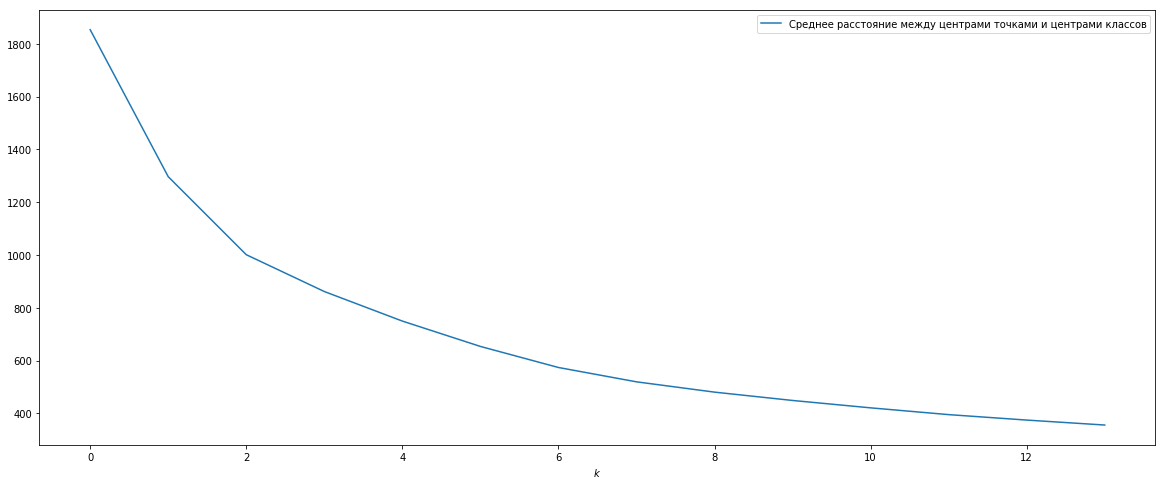

In [34]:
plt.plot(inertia,label='Среднее расстояние между центрами точками и центрами классов')
plt.xlabel('$k$')
plt.legend()

<font color=darkblue>как меняются показатели v_measure homogeneity completeness с ростом числа k. при каком числе кластеров v_measure принимает максимальное значение.</font>

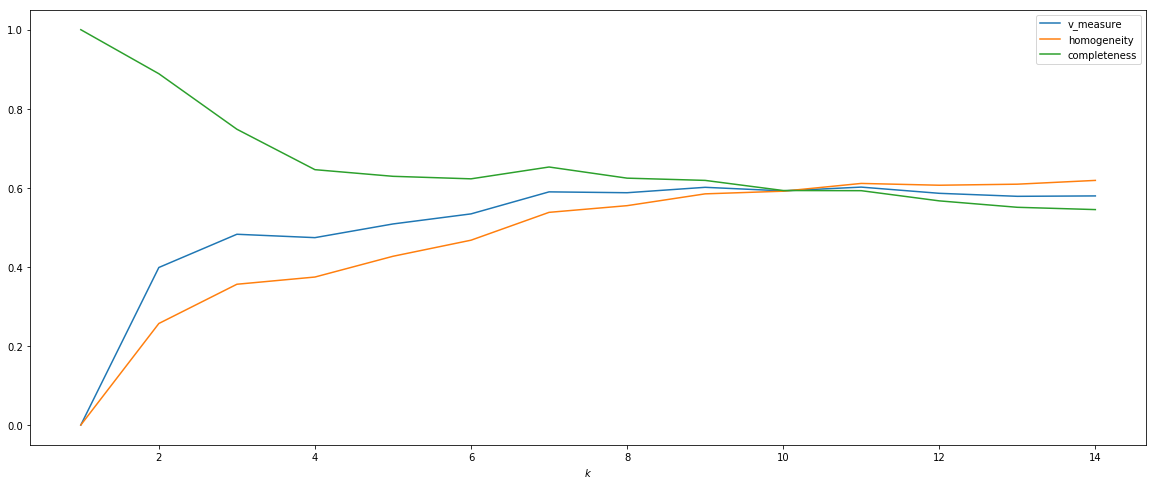

In [35]:
plt.plot(kx, v_m,label='v_measure');
plt.plot(kx, hg,label='homogeneity');
plt.plot(kx, cn,label='completeness');
plt.xlabel('$k$')
plt.legend()

### Состав сформированных кластеров  
<font color=darkblue>вычислим 3 разбиения на кластеры:
- к-средних для k=10
- иерархическая(distance) - где расстояние между элементами кластера не более 2.4. число кластеров определяетс в процессе вычисления
- иерерихческая(maxclust) - где число плоских кластеров устанавливается не менее порога 10. 

и запишем результаты в датафрейм cluster_df</font>

In [36]:
cluster_df = df.copy()
cluster_x = X
dist_matrix = pdist(cluster_x, metric=metric)
kmeans = KMeans(n_clusters=len(classes), random_state=0).fit(cluster_x)
kmeans_y = kmeans.predict(cluster_x)
Z = linkage(dist_matrix, 'ward') #single/ward
hierarch_1 = fcluster(Z, 2.4, criterion="distance")
hierarch_2 = fcluster(Z, 10, criterion="maxclust")
cluster_df["kmeans"] = kmeans_y
cluster_df["distance"] = hierarch_1
cluster_df["maxclust"] = hierarch_2

<font color=darkblue>визуализируем из каких объектов состоят разделившиеся кластеры. можно определить объекты в каких кластерах чаще всего путаются</font>

In [37]:
from IPython.html import widgets
from IPython.display import display, clear_output, HTML
from ipywidgets import HBox, VBox, Layout, Output
import tabulate

cluster_types = ["kmeans","distance","maxclust"]
column_name = 'Y_str'


def select_cluster_type(cluster_type):
    with out:
        clear_output()

    clusters = sorted(set(cluster_df[cluster_type]))
    clusters_list.options = clusters
    select_cluster(clusters[0])

    
def select_cluster(cluster_name):
    with out:
        clear_output()
        
        value_counts = df[cluster_df[cluster_type.value] == cluster_name][column_name].value_counts()
        summa = sum(value_counts)
        
        table = []
        headers = ["Категория", "Количество", "Доля в текущем кластере", "Доля от всех объектов категории"]
        for elem in value_counts.iteritems():
            count = len(df[df[column_name] == elem[0]])
            table.append([elem[0], elem[1], "{0:.3f}%".format(elem[1] / summa), "{0:.3f}%".format(elem[1] / count)])
        display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))
        

cluster_type = widgets.Select(options=cluster_types, description="Тип", rows=10)
clusters_list = widgets.Select(options=[], description="Кластер", rows=10)

i = widgets.interactive(select_cluster_type, cluster_type=cluster_type)
j = widgets.interactive(select_cluster, cluster_name=clusters_list)

out = Output()

VBox([HBox([i, j]), out])

/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


VBox(children=(HBox(children=(interactive(children=(Select(description='Тип', options=('kmeans', 'distance', 'maxclust'), rows=10, value='kmeans'), Output()), _dom_classes=('widget-interact',)), interactive(children=(Select(description='Кластер', options=(), rows=10, value=None), Output()), _dom_classes=('widget-interact',)))), Output()))

# Силуэт


<font color=darkblue>Данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Сначала силуэт определяется отдельно для каждого объекта. Силуэтом выборки называется средняя величина силуэта объектов данной выборки.

Силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Коэффициент лежит в диапазоне (-1; 1). Значения: 
- близкие к -1, соответствуют плохим (разрозненным) кластеризациям, 
- близкие к 0, говорят о том, что кластеры пересекаются и накладываются друг на друга,
- близкие к 1, соответствуют "плотным" четко выделенным кластерам.
Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.С помощью силуэта можно выбирать оптимальное число кластеров  (если оно заранее неизвестно) — выбирается число кластеров, максимизирующее значение силуэта.</font>

Для кол-ва кластеров = 2 средний коэффициент силуэта: 0.19151360587015062
Для кол-ва кластеров = 4 средний коэффициент силуэта: 0.1786777838936512
Для кол-ва кластеров = 6 средний коэффициент силуэта: 0.15712372741395203
Для кол-ва кластеров = 8 средний коэффициент силуэта: 0.16423326024199053
Для кол-ва кластеров = 10 средний коэффициент силуэта: 0.15645392390293963
Для кол-ва кластеров = 15 средний коэффициент силуэта: 0.13210559887704948


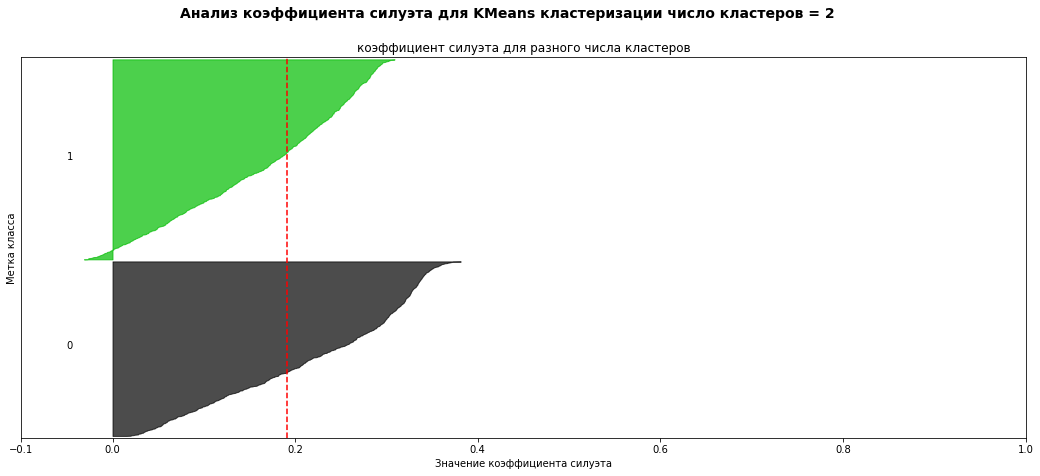

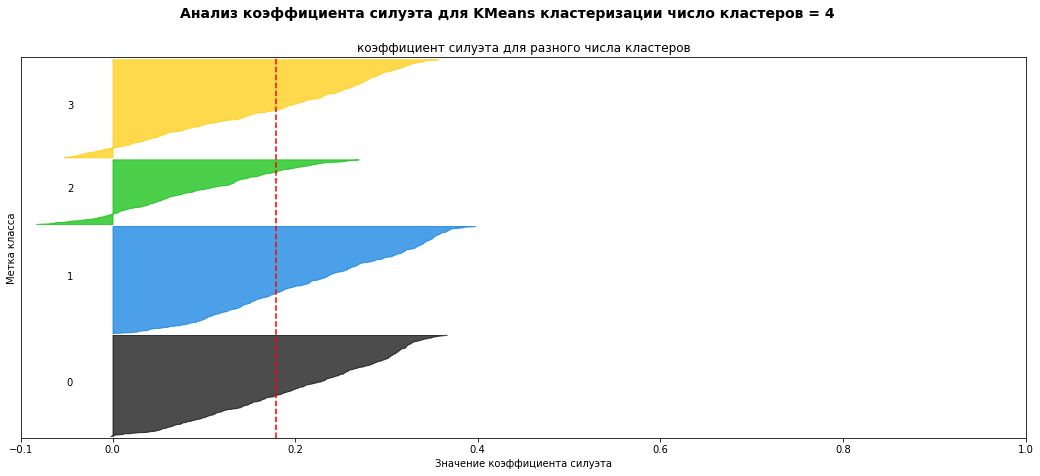

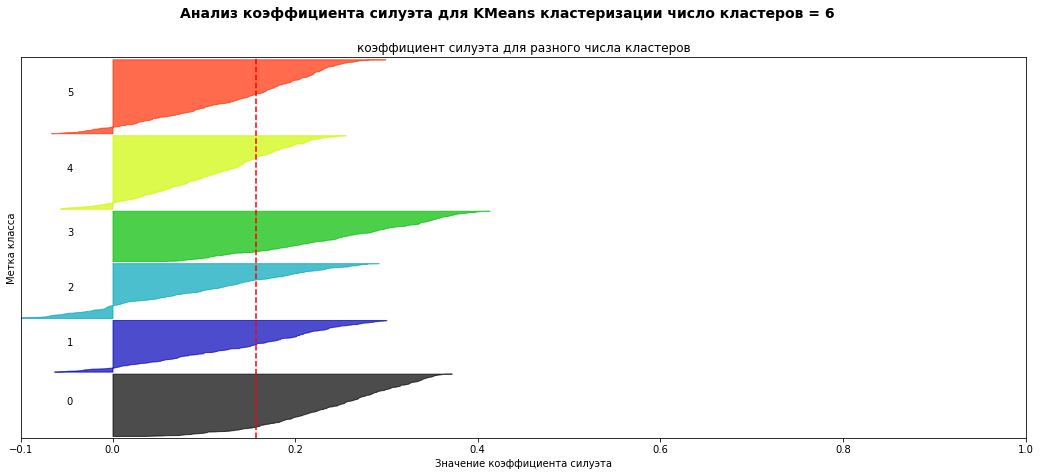

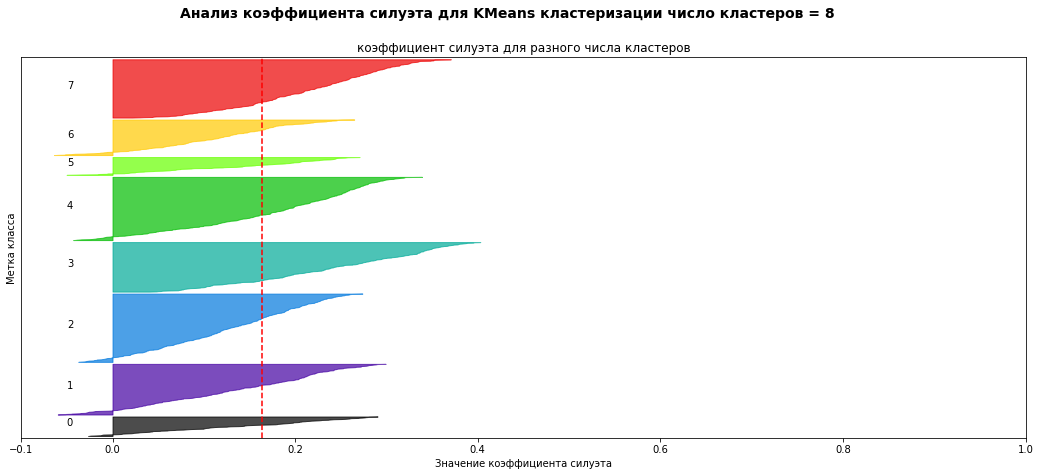

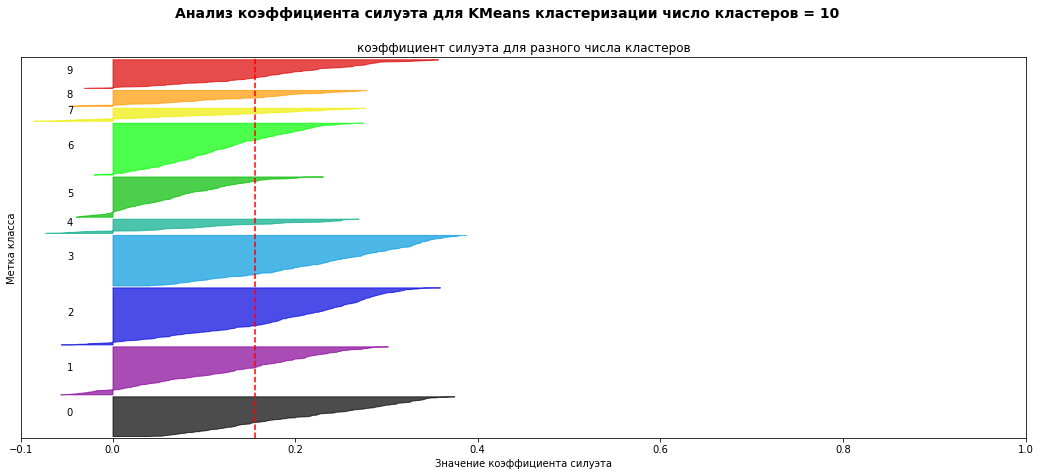

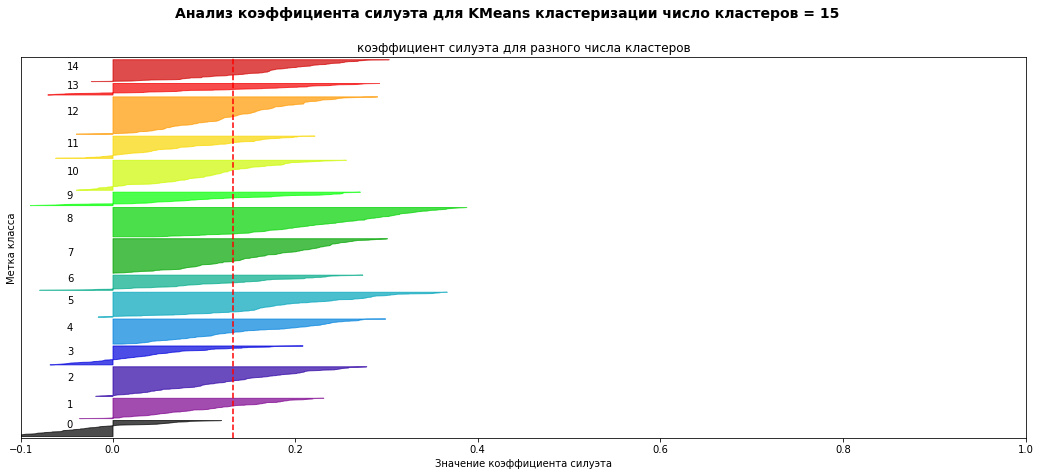

In [38]:
range_n_clusters = [2, 4, 6, 8, 10, 15]

for n_clusters in range_n_clusters:
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 7)

    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("Для кол-ва кластеров =", n_clusters,
          "средний коэффициент силуэта:", silhouette_avg)

    # вычисляем коээфициент силуэта для каждого элемента
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # сортируем все элементы попавшие в один кластер 
        ith_cluster_silhouette_values =  sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("коэффициент силуэта для разного числа кластеров")
    ax.set_xlabel("Значение коэффициента силуэта")
    ax.set_ylabel("Метка класса")

    # Вертикальная линяя показывает среднее значение для всей выборки
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax.set_yticks([])  
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Анализ коэффициента силуэта для KMeans кластеризации "
                  "число кластеров = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()